# **Métodos Computacionales**
 **Taller 1**
 
 **Estudiantes**: Juan C. Rojas V. (202214037) & Esteban Parra C. (202123260)

## **Ejercicio 2.01.1: Factoriales**
Escriba una función que calcule el factorial de $n$, con $n \in \mathbb{N}$. 

$$n! = n(n − 1)(n − 2) \dots 1 $$
Calcule los primeros 20 números factoriales.

In [239]:
def factorial(n:int) -> int:
    """
    La función recibe como parámetro un número entero n y devuelve un número entero, 
    siendo este el factorial del número ingresado.

    Args:
        n (int): Número entero al que se quiere operar.

    Returns:
        int: Factorial del número ingresado.
    """
    fact = n
    while n > 1:
        fact *= n-1
        n -= 1
        
    return fact

        

In [240]:
#Requerimiento de los primero 20 números factoriales.

for i in range(1,21):
    print("El factorial de %s es %s"%(i,factorial(i)))

El factorial de 1 es 1
El factorial de 2 es 2
El factorial de 3 es 6
El factorial de 4 es 24
El factorial de 5 es 120
El factorial de 6 es 720
El factorial de 7 es 5040
El factorial de 8 es 40320
El factorial de 9 es 362880
El factorial de 10 es 3628800
El factorial de 11 es 39916800
El factorial de 12 es 479001600
El factorial de 13 es 6227020800
El factorial de 14 es 87178291200
El factorial de 15 es 1307674368000
El factorial de 16 es 20922789888000
El factorial de 17 es 355687428096000
El factorial de 18 es 6402373705728000
El factorial de 19 es 121645100408832000
El factorial de 20 es 2432902008176640000


## **Ejercicio 2.02: Máximos**

Descargar los datos de: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt Y diseñar un algoritmo
para encontrar todos los máximos locales en esta serie de datos.

In [241]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt'
filename = 'Data/DatosMaximo.txt'
urllib.request.urlretrieve(url, filename)
data = np.loadtxt(filename)

x = data[:,0]
y = data[:,1]


Si se quiere verificar que un valor $x_i \in \{ x_0, x_1, \dots x_n\}$ dé como salida un máximo de una función $f(x_i)$ se debe comprobar que $$\frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}} > 0$$ y $$\frac{f(x_{i+1}) - f(x_{i})}{x_{i+1} - x_{i}} < 0$$

In [242]:
def VerifyMax(x:list,y:list) :
    """
    La función tiene como entrada dos listas con los valores de espectro de una estrella y retorna una lista de tuplas,
    siendo estas las posiciones de los puntos máximos.

    Args:
        x (list): Valores de espectro
        y (list): Valores de intensidad

    Returns:
        list: Lista de tuplas con los máximos locales de los datos.
    """
    
    xmax_points = []
    ymax_points = []
    
    for i in range(2, len(x)-1):
        left_handed_slope = (y[i]-y[i-1])/(x[i] - x[i-1])
        right_handed_slope = (y[i+1]-y[i])/(x[i+1] - x[i])
        if right_handed_slope < 0 and left_handed_slope > 0:
            xmax_points.append(x[i])
            ymax_points.append(y[i])
        
    return xmax_points, ymax_points

x_max,y_max = VerifyMax(x,y) 

plt.plot(x,y)
plt.scatter(x_max,y_max,color="red")
plt.show()



## **Ejercicio 2.03: Sucesión de Fibonacci**

1. La sucesión de Fibonacci está definida por la siguiente definición recurrente: 
$$ \begin{gather*}
f_0 = 0 \\
f_1 = 1 \\
f_n = f_{n-1} + f_{n-2}
\end{gather*} $$

Encuentre los primeros 20 términos de la sucesión.

In [243]:
fibo_sequence = [0,1]
for i in range(2,21):
    fibo_sequence.append(fibo_sequence[i-1] + fibo_sequence[i-2])
    
fibo_sequence

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765]

2. Graficar la sucesión de Fibonacci

In [244]:
plt.plot(np.linspace(0,21,21),fibo_sequence)
plt.legend(["Serie de Fibonacci"])
plt.show()

3. El número aureo está dado por: $$\varphi = \frac{1+\sqrt{5}}{2} $$
La sucesión de Fibonacci se relaciona con este número de la siguiente forma: $$\varphi = \lim_{n\to\infty}\frac{f_{n+1}}{f_n} $$
Usando la sucesión de números de Fibonacci, calcular el número aureo y compararlo con el valor exacto.

In [245]:
real_phi = (1+np.sqrt(5))/2

phi_stimation = []

for i in range(2,21):
    phi_stimation.append(fibo_sequence[i]/fibo_sequence[i-1])
    
plt.plot(np.linspace(0,19,19),phi_stimation)
plt.axhline(y=real_phi,color='r',ls='--')
plt.legend(["Estimación usando la serie","Número aureo"])

## **Ejercicio 2.08**


In [257]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

In [295]:
class Particle:
    
    def __init__(self,r0,v0,a0,t,m=1,radius=2,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.m = m
        self.choque = False
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def CheckLimits(self,Limits):
        for i in range(2):
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
                
    def CheckColision(self, particle1):
        K = 1
        fuerza = 0
        pos_diference = self.r - particle1.r
        norm_pos_dif = np.sqrt(np.sum(pos_diference**2))
        normalized = (-1*pos_diference)/norm_pos_dif
        
        
        
        if norm_pos_dif <= self.radius + particle1.radius and not self.choque  :
            fuerza = -(K*(norm_pos_dif**3)*normalized)
            self.a =  fuerza/self.m
            self.choque = True
            self.new_vel()
            
        else:
            self.choque = False
            
        
            
    def new_vel(self):
        if self.choque:
            self.v = self.v + self.dt*self.a
            self.a = np.array([0.,0.])
        
            
        

In [296]:
tmax=20
dt=0.05
t = np.arange(-1.,tmax,dt)
p1 = Particle(np.array([0,0]),np.array([0.,0.]),np.array([0.,0.]),t)
p2 = Particle(np.array([3.,4.]),np.array([0.,0.]),np.array([0.,0.]),t)

p1.a
p1.CheckColision(p2)
p1.a


array([0., 0.])

In [297]:

def RunSimulation1(t,Wall,p1,p2):
    
    
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        
        p1.Evolution(it)
        p2.Evolution(it)
         
        
        p1.CheckColision(p2)
        p2.CheckColision(p1)
        
        p1

        
        p1.CheckLimits(Wall_)
        p2.CheckLimits(Wall_)
        
        
        
    
    return p1,p2



In [298]:
# Region
Limits = np.array([[-20.,20.],[-20.,20.]])
Limits

array([[-20.,  20.],
       [-20.,  20.]])

In [299]:
dt = 0.05
tmax = 10
r0 = np.array([-15,0.])
v0 = np.array([10.,0.])
a0 = np.array([0.,0])

r1 = np.array([0.,-1.5])
v1 = np.array([0.,0.])
a1 = np.array([0.,0])
    
    
p1 = Particle(r0,v0,a0,t)
p2 = Particle(r1,v1,a1,t)
t = np.arange(0.,tmax,dt)

particle = RunSimulation1(t,Limits,p1,p2)
# particle_2 = RunSimulation1(t,Limits,p2,p1)

Running simulation: 100%|████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 64.29 Steps/s]


In [300]:
scale = 1

In [301]:
t = t[::scale]

In [302]:
#Particles.GetPosition(3)

<IPython.core.display.Javascript object>


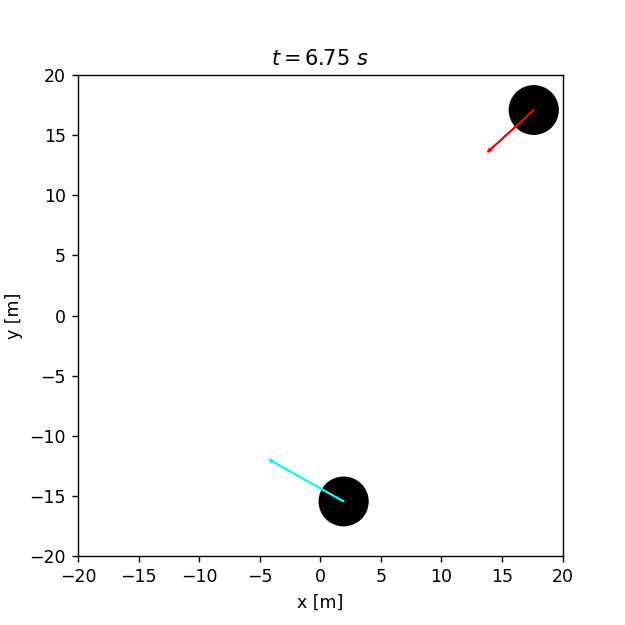

In [303]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    
    x = particle[0].GetPosition(scale)[i,0]
    y = particle[0].GetPosition(scale)[i,1]
    vx = particle[0].GetVelocity(scale)[i,0]
    vy = particle[0].GetVelocity(scale)[i,1]
    x_2 = particle[1].GetPosition(scale)[i,0]
    y_2 = particle[1].GetPosition(scale)[i,1]
    vx_2 = particle[1].GetVelocity(scale)[i,0]
    vy_2 = particle[1].GetVelocity(scale)[i,1]
    
    circle = plt.Circle((x,y),particle[0].radius, fill=True, color='k')
    ax.add_patch(circle)
    
    ax.arrow(x,y,vx,vy,color='r',head_width=0.2,length_includes_head=True)
    
    circle_2 = plt.Circle((x_2,y_2),particle[1].radius, fill=True, color='k')
    ax.add_patch(circle_2)
    
    ax.arrow(x_2,y_2,vx_2,vy_2,color='cyan',head_width=0.2,length_includes_head=True)
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)


## **Ejercicio 3.7.5**

Demuestre que $D^4f$ está dado por:

$$D^4f \approx \frac{f(x_{j+2})-4f(x_{j+1})+6f(x_j)-4f(x_{j-1})+f(x_{j-2})}{h^4}$$

Para este operador, ¿cuál es el orden $\mathcal{O}(h^k)$ de aproximación?

Segundo Punto

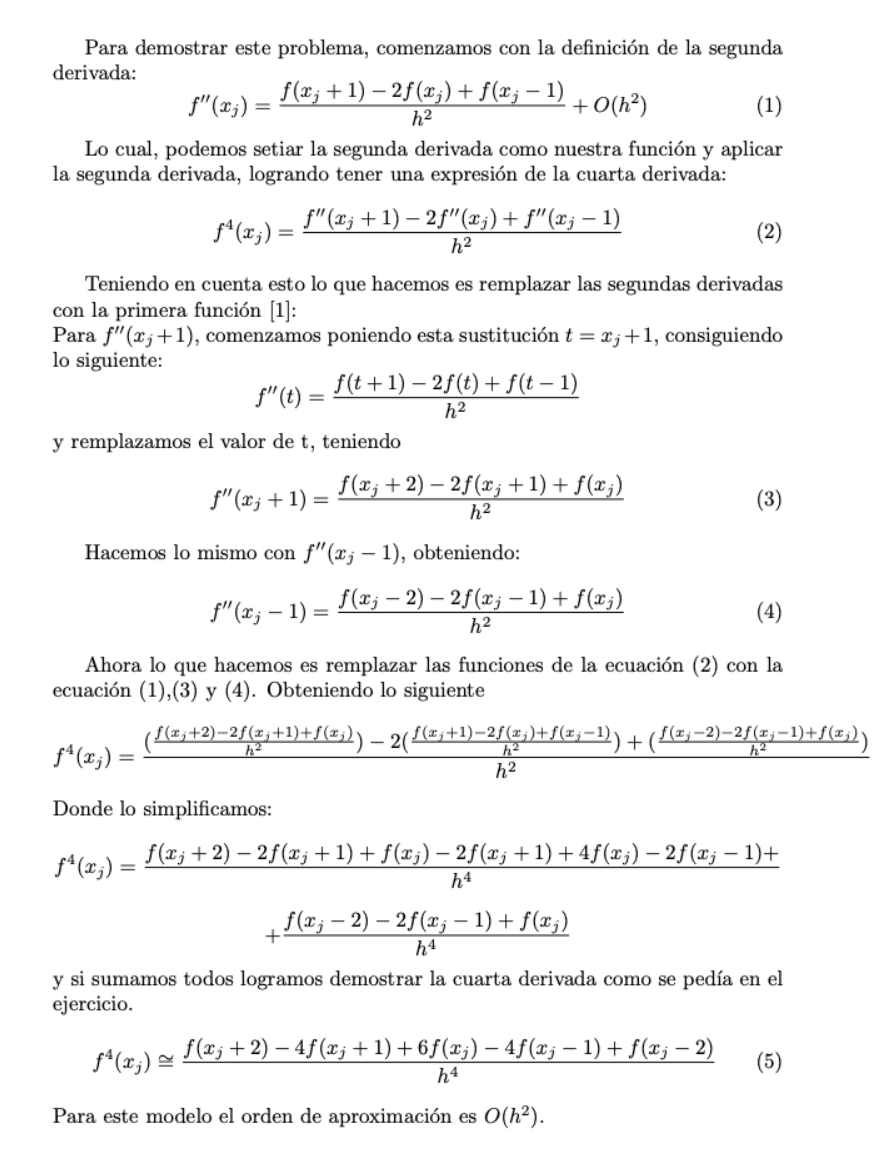

## **Ejercicio 3.7.6**

In [84]:
Radio_cilindro_cm = 2
v_cm_s = 2

Definir una discretización en los ejes x e y, donde la regio ́n es: A ∈ [−4,4] con 25 puntos en cada eje.


In [85]:
x_axis = np.linspace(-4,4,25)
y_axis = np.linspace(-4,4,25)

Definir la función potencial del flujo dada por:


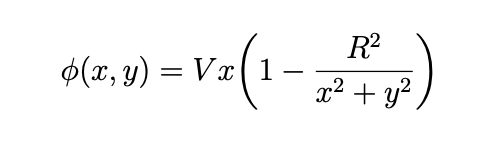

donde V = 2 cm/s

In [86]:
def funcion_potencial(x,y):
  return v_cm_s*x*(1-((Radio_cilindro_cm**2)/((x**2)+(y**2))))




Calcule y guarde adecuadamente el campo de velocidades usando la definicio ́n de derivada parcial central como:

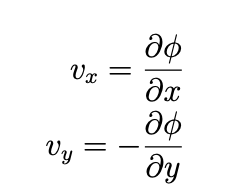

use h = 0.001. Note que al interior del cilindro el campo de velocidades debe ser igual a cero.

In [87]:
h=0.001

def derivada_x (x,y):
  return (funcion_potencial(x+h,y)-funcion_potencial(x-h,y))/(2*h)

def derivada_y (x,y):
  return -(funcion_potencial(x,y+h)-funcion_potencial(x,y-h))/(2*h)



Dibuje el campo de velocidades usando el m ́etodo: ax.quiver(x[i],y[j],Vx[i,j],Vy[i,j]).

<IPython.core.display.Javascript object>


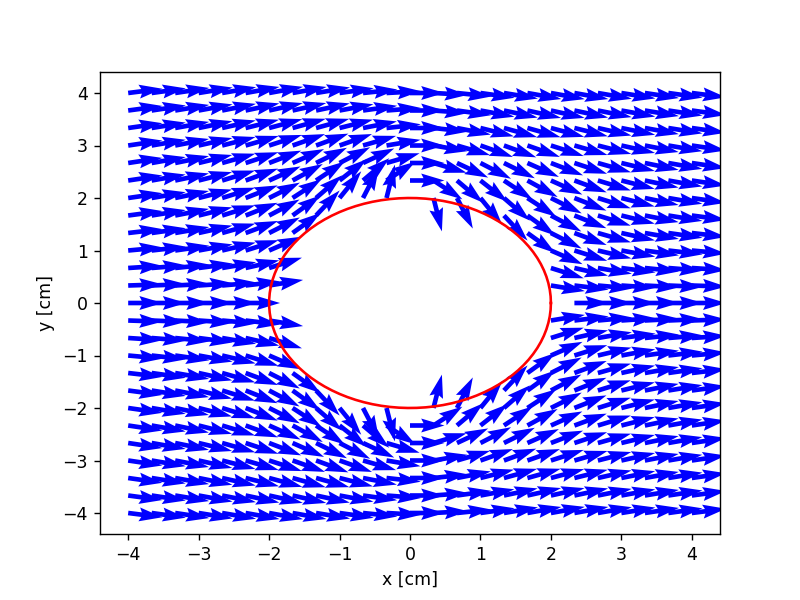

In [88]:

theta = np.linspace(0, 2*np.pi, 100)


a = Radio_cilindro_cm*np.cos(theta)
b = Radio_cilindro_cm*np.sin(theta)

figure, ax = plt.subplots()


#vectores
ax = plt.subplot()
for i in x_axis:
  for j in y_axis:
    if (i**2 +j**2) > 4:
      
      ax.quiver(i,j,derivada_x(i,j),derivada_y(i,j), color="b")


ax.set(xlabel='x [cm]', ylabel='y [cm]')
#circulo
ax.plot(a, b,color="r")


plt.show()

## **Ejercicio 3.10.3: Raíces de un polinomio**

Calcular **todas** las raíces reales de:
$$f(x) = 3x^5 +5x^4 -x^3$$

In [89]:
h=0.001
def thefun(x):
  return 3*(x**5)+5*(x**4)-(x**3)

def thefunder(x):
    return (thefun(x+h)-thefun(x-h))/(2*h)
  

def newtrap(x):
    newx = x - thefun(x)/thefunder(x)
    return newx


numeros =  np.linspace(-3,3,100)


for i in range(10000):
    numeros=newtrap(numeros)

raices = []

for every in numeros:
  if round(every,4) != 0 and round(every,5) not in raices:
    raices.append(round(every,5))
  elif round(every,4) == 0 and round(every,4) not in raices:
    raices.append(0.0)




  

print("Para la ecuación f(x) = 3x^(5)+5x^(4)-x^(3), las raices son:", raices )
    

Para la ecuación f(x) = 3x^(5)+5x^(4)-x^(3), las raices son: [-1.84713, 0.18046, 0.0]
